# Example ECDF plots

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

<br />

### Load the data set

In [2]:
df = pd.read_csv('data/finch_beaks_2012.csv', comment='#')

# Delete any birds measured more than once
df = df.drop_duplicates('band')

<br />

### Function to make x and y values for ECDF plots

In [3]:
def ecdf(data, formal=False, x_range=None):
    """
    Get x, y, values of an ECDF for plotting.

    Parameters
    ----------
    data : ndarray
        One dimensional Numpay array with data.
    formal : bool, default False
        If True, generate x and y values for formal ECDF (staircase). If
        False, generate x and y values for ECDF as dots.
    x_range : 2-tuple, default None
        If not None and `formal` is True, then specifies range of plot
        on x-axis.

    Returns
    -------
    x : ndarray
        x-values for plot
    y : ndarray
        y-values for plot
    """
    x = np.sort(data)
    y = np.arange(1, len(data)+1) / len(data)

    if formal:
        # Set up output arrays
        x_formal = np.empty(2*(len(x) + 1))
        y_formal = np.empty(2*(len(x) + 1))

        # y-values for steps
        y_formal[:2] = 0
        y_formal[2::2] = y
        y_formal[3::2] = y

        # x- values for steps
        x_formal[0] = x[0]
        x_formal[1] = x[0]
        x_formal[2::2] = x
        x_formal[3:-1:2] = x[1:]
        x_formal[-1] = x[-1]
        
        if x_range is not None:
            if np.all(x >= x_range[0]) and np.all(x <= x_range[1]):
                x_formal = np.concatenate(((x_range[0],), x_formal, (x_range[1],)))
                y_formal = np.concatenate(((0,), y_formal, (1,)))
            else:
                raise RuntimeError('Some data values outside of `x_range`.')

        return x_formal, y_formal
    else:
        return x, y

<br />

### Make an ECDF with dots

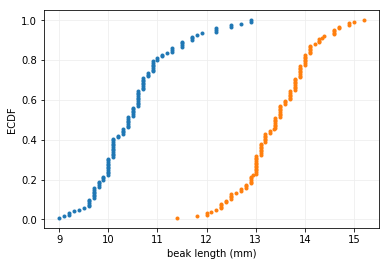

In [4]:
# Set up axes
fig, ax = plt.subplots()
ax.grid(color='#eeeeee')
ax.set_xlabel('beak length (mm)')
ax.set_ylabel('ECDF')

# Plot ECDFs
for species in ['fortis', 'scandens']:
    ax.plot(*ecdf(df.loc[df['species']==species, 'blength']), '.', label=species)

<br />

### Make a formal ECDF plot

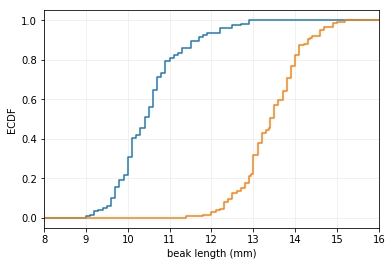

In [5]:
# Set up axes
fig, ax = plt.subplots()
ax.grid(color='#eeeeee')
ax.set_xlim(8, 16)
ax.set_xlabel('beak length (mm)')
ax.set_ylabel('ECDF')

# Plot ECDFs
for species in ['fortis', 'scandens']:
    ax.plot(*ecdf(df.loc[df['species']==species, 'blength'], formal=True, x_range=(8, 16)),
            label=species)